KWANZA TUKULE DATA ANALYST ASSESSMENT

SECTION 1: DATA CLEANING AND PREPARATION
- In this section I will do a Data quality Assessment and Feature Engineering

In [122]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
sales_data =pd.read_csv('casestudy_sales_data.csv')

In [6]:
# Display the first few rows
sales_data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


Data Quality Assessment
- Check for missing values, duplicates and inconsistent data types.

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [12]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64


In [14]:
# Check for duplicates
duplicates = sales_data.duplicated().sum()
print("Checking for duplicates:")
print(duplicates)

Checking for duplicates:
3524


In [15]:
# Check data_types
data_types = sales_data.dtypes
data_types

DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object

Data Cleaning

In [19]:
# Drop duplicate rows
sales_data_cleaned = sales_data.drop_duplicates()

In [20]:
# Handle missing values in 'UNIT PRICE' column by filling with 0 (or could use mean/median if appropriate)
# Ensure the column is treated as a string first
sales_data_cleaned['UNIT PRICE'] = sales_data_cleaned['UNIT PRICE'].astype(str).str.replace(',', '').astype(float)
sales_data_cleaned['UNIT PRICE'] = sales_data_cleaned['UNIT PRICE'].fillna(0)

In [23]:
print(sales_data_cleaned['UNIT PRICE'].dtype)
print(sales_data_cleaned['UNIT PRICE'].head())

float64
0     850.0
1    1910.0
2    3670.0
3    2605.0
4    1480.0
Name: UNIT PRICE, dtype: float64


SUMMARY
1. Issues Identified
- There were 8 missing values in the UNIT PRICE column.
- The dataset contained 3524 duplicate rows
- The data types were consistent in all columns

2. Steps Taken to Resolve The Issues above
- Removed duplicates from the dataset by dropping all duplicated rows to ensure unique records.
- Handled the column with the missing values by replacing the missing values in the UNIT PRICE column with the column's mean value to maintain consistency.

Feature Engineering

In [27]:
# Creating the 'Month-Year' column from the 'DATE' column
sales_data_cleaned['DATE'] = pd.to_datetime(sales_data_cleaned['DATE'])  # Converting to datetime format
sales_data_cleaned['Month-Year'] = sales_data_cleaned['DATE'].dt.strftime('%B %Y')

In [28]:
sales_data_cleaned.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024


Created A new column, "Month-Year," which was created from the "DATE" column

In [30]:
# Save the cleaned dataset to a new file for reference
sales_data_cleaned.to_csv('Case_Study_Data_Cleaned.csv', index=False)

SECTION 2: EXPLORATORY DATA ANALYSIS (EDA)

Summary Statistics

In [33]:
# Summary statistics
summary_stats = sales_data_cleaned[['QUANTITY', 'UNIT PRICE']].describe()
summary_stats

,QUANTITY,UNIT PRICE
count,329881.000000,329881.000000
mean,2.321507,2318.960340
std,3.767796,1582.600714
min,0.000000,0.000000
25%,1.000000,1420.000000
50%,1.000000,1840.000000
75%,2.000000,2750.000000
max,359.000000,16136.000000


Sales Overview

- Group Data by Anonymized Category and Anonymized Business- 
Visualize the data to display the aggregated Quantity and Value for each category and business.

To calculate the Value(Total Sales) = Quantity * Unit Price

In [36]:
# Calculate Value for each column
sales_data_cleaned['VALUE'] = sales_data_cleaned['QUANTITY'] * sales_data_cleaned['UNIT PRICE']

In [37]:
sales_data_cleaned[['QUANTITY', 'UNIT PRICE', 'VALUE']].head()

,QUANTITY,UNIT PRICE,VALUE
0,1,850.0,850.0
1,2,1910.0,3820.0
2,1,3670.0,3670.0
3,1,2605.0,2605.0
4,5,1480.0,7400.0


In [38]:
# Group by ANONYMIZED CATEGORY
category_sales = sales_data_cleaned.groupby('ANONYMIZED CATEGORY').agg(Total_Quantity= ('QUANTITY', 'sum'), Total_Value= ('VALUE', 'sum')).reset_index()

In [39]:
# Group by ANONYMIZED BUSINESS
business_sales = sales_data_cleaned.groupby('ANONYMIZED BUSINESS').agg(Total_Quantity= ('QUANTITY', 'sum'), Total_Value= ('VALUE', 'sum')).reset_index()

Visualization for the Sales Overview

In [41]:
Category_sales_Quantity= category_sales.sort_values(by=['Total_Quantity'], ascending=False)
Category_sales_Quantity.head(10)

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
18,Category-120,169715,319178743.0
25,Category-75,151330,544658700.0
0,Category-100,76824,134902751.0
26,Category-76,71719,344939553.0
17,Category-119,68332,103454819.0
27,Category-77,28455,76741382.0
40,Category-94,23670,16750815.0
34,Category-85,22997,33762533.0
38,Category-91,20853,44152103.0
1,Category-101,19585,35577822.0


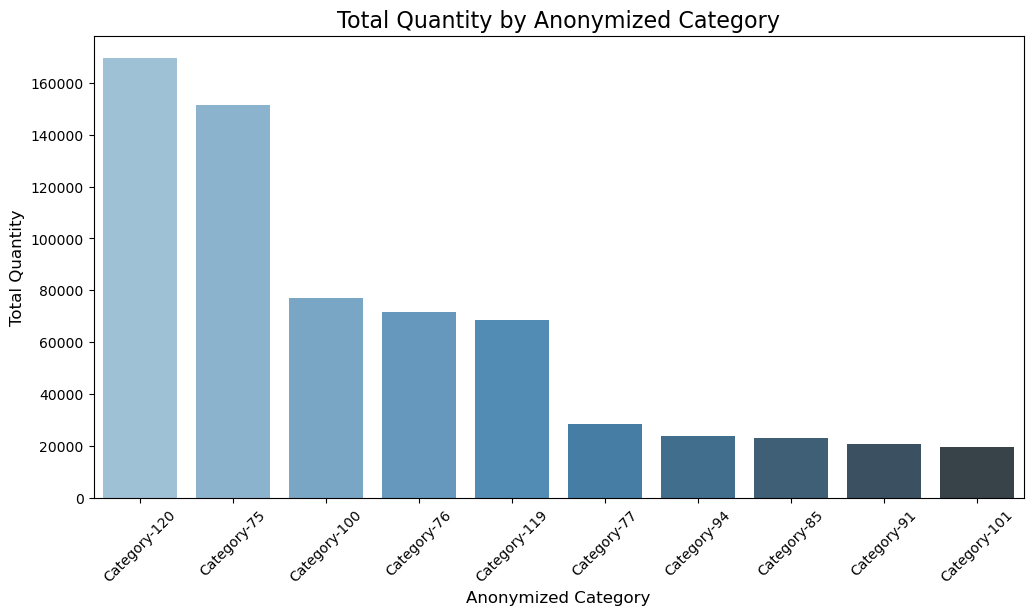

In [42]:
# Bar chart for Total Quantity by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=Category_sales_Quantity.head(10), x="ANONYMIZED CATEGORY", y="Total_Quantity", palette="Blues_d")
plt.title("Total Quantity by Anonymized Category", fontsize=16)
plt.xlabel("Anonymized Category", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [53]:
Category_sales_Value = category_sales.sort_values(by=['Total_Value'], ascending=False)
Category_sales_Value.head()

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
25,Category-75,151330,544658700.0
26,Category-76,71719,344939553.0
18,Category-120,169715,319178743.0
0,Category-100,76824,134902751.0
17,Category-119,68332,103454819.0


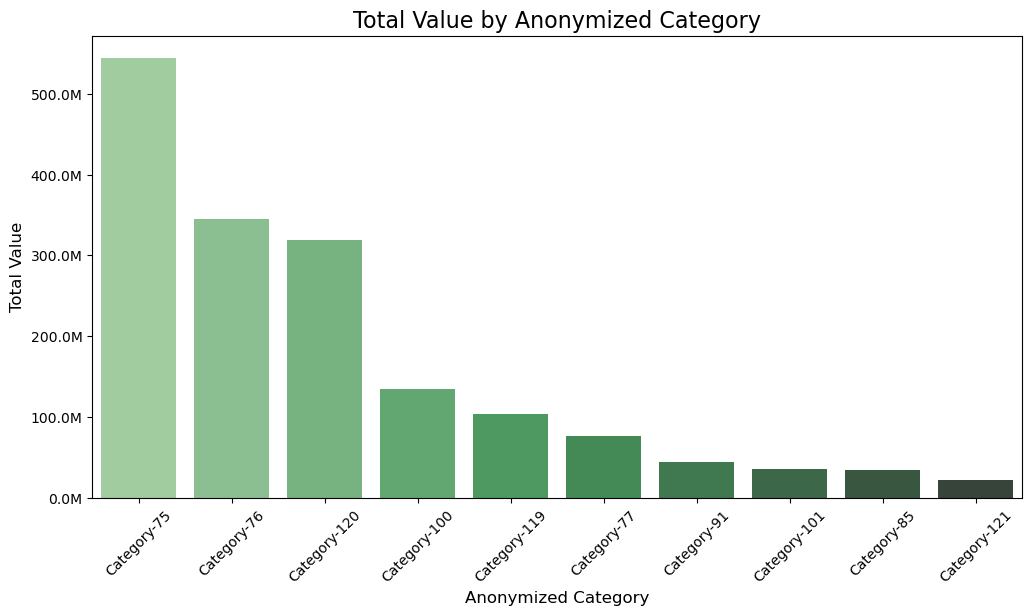

In [55]:
from matplotlib.ticker import FuncFormatter

# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M' 
    
# Bar chart for Total Value by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=Category_sales_Value.head(10), x="ANONYMIZED CATEGORY", y="Total_Value", palette="Greens_d")

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.title("Total Value by Anonymized Category", fontsize=16)
plt.xlabel("Anonymized Category", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [57]:
Business_sales_Quantity= business_sales.sort_values(by=['Total_Quantity'], ascending=False)
Business_sales_Quantity.head(10)

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
2906,Business-978e,13991,28037358.0
1873,Business-6068,8214,16464195.0
4781,Business-fe7d,6743,26997121.0
2353,Business-7a03,6318,13968451.0
144,Business-07de,6065,16258068.0
3533,Business-ba13,5533,13650016.0
1385,Business-468e,5450,12546597.0
584,Business-1e3e,4981,13192967.0
3851,Business-cb1f,4636,9602700.0
2503,Business-80b3,4303,9275497.0


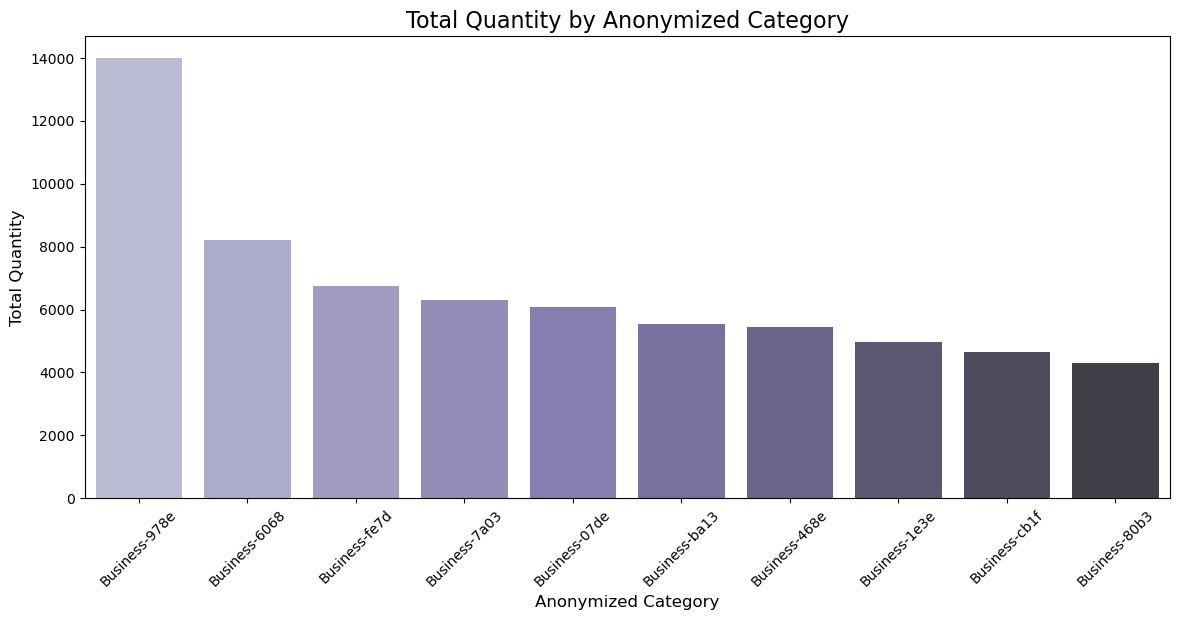

In [59]:
# Bar chart for Total Quantity by Category
plt.figure(figsize=(14, 6))
sns.barplot(data=Business_sales_Quantity.head(10), x="ANONYMIZED BUSINESS", y="Total_Quantity", palette="Purples_d")
plt.title("Total Quantity by Anonymized Category", fontsize=16)
plt.xlabel("Anonymized Category", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.show()

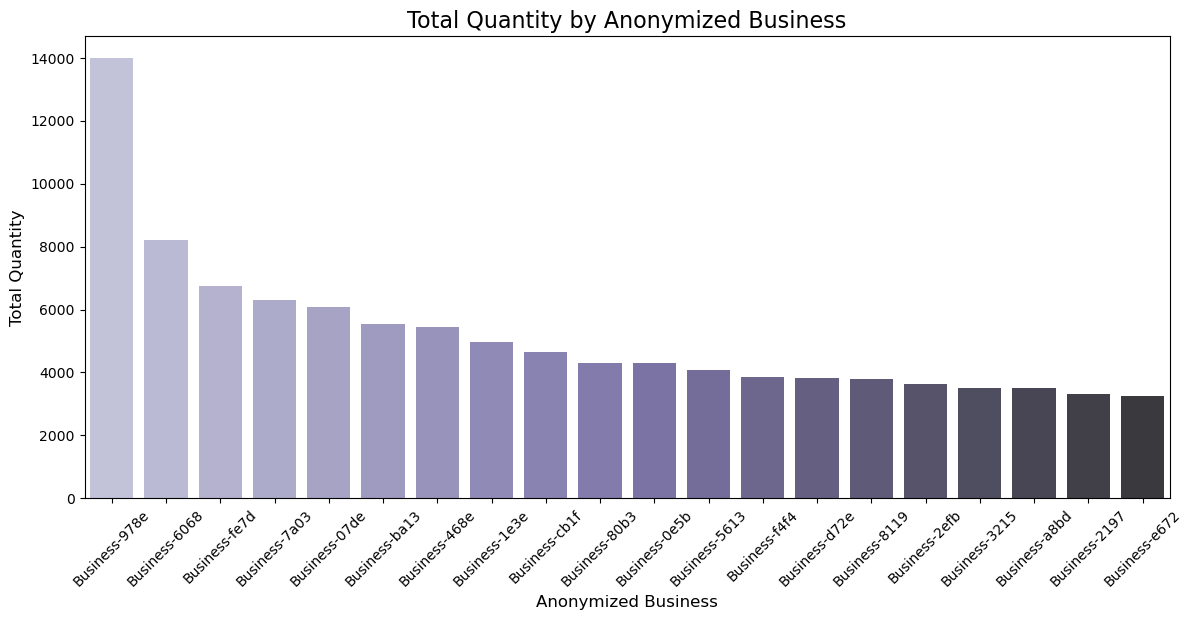

In [61]:
# Bar chart for Total Quantity by Business
plt.figure(figsize=(14, 6))
sns.barplot(data=Business_sales_Quantity.head(20), x="ANONYMIZED BUSINESS", y="Total_Quantity", palette="Purples_d")
plt.title("Total Quantity by Anonymized Business", fontsize=16)
plt.xlabel("Anonymized Business", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [62]:
Business_sales_Value= business_sales.sort_values(by=['Total_Value'], ascending=False)
Business_sales_Value.head(10)

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
2906,Business-978e,13991,28037358.0
4781,Business-fe7d,6743,26997121.0
1873,Business-6068,8214,16464195.0
144,Business-07de,6065,16258068.0
2353,Business-7a03,6318,13968451.0
3533,Business-ba13,5533,13650016.0
584,Business-1e3e,4981,13192967.0
1385,Business-468e,5450,12546597.0
4585,Business-f4f4,3852,11952941.0
1674,Business-5613,4089,11895552.0


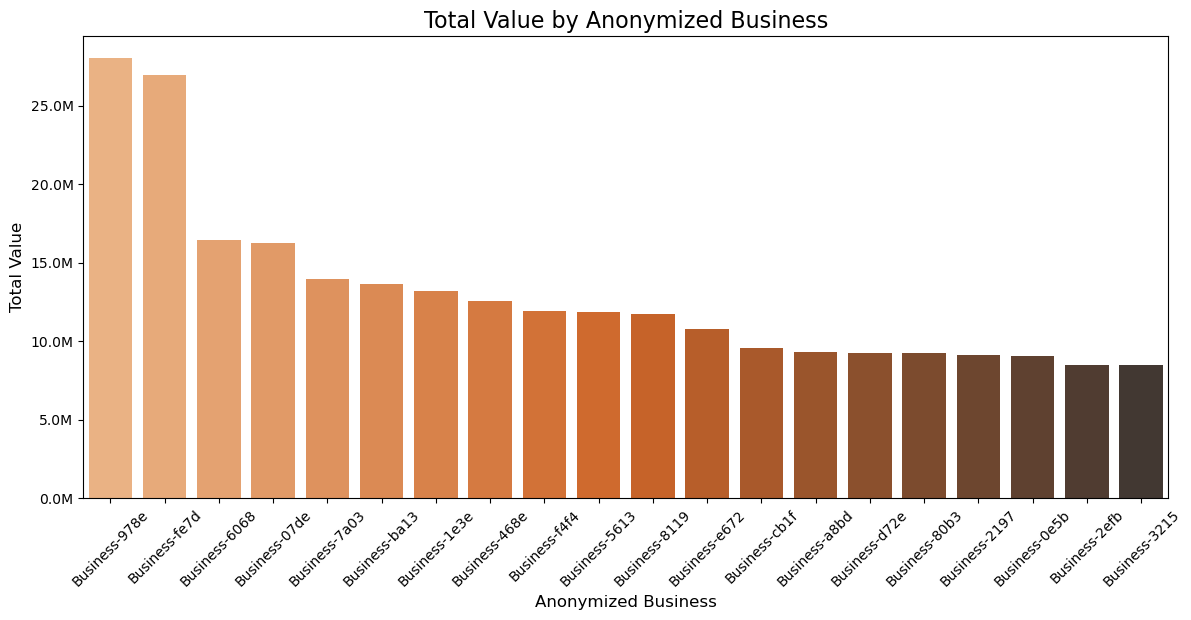

In [65]:
# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'
    
# Bar chart for Total Value by Business
plt.figure(figsize=(14, 6))
sns.barplot(data=Business_sales_Value.head(20), x="ANONYMIZED BUSINESS", y="Total_Value", palette="Oranges_d")

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.title("Total Value by Anonymized Business", fontsize=16)
plt.xlabel("Anonymized Business", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45)
plt.show()

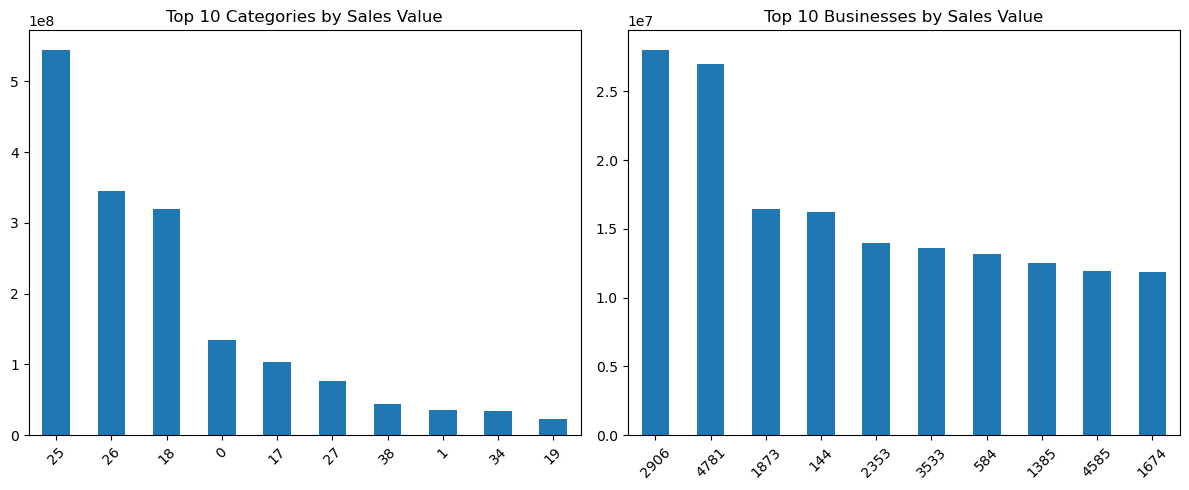

In [67]:
# Visualizations for Category and Business Sales By Total Value
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
Category_sales_Value['Total_Value'].head(10).plot(kind='bar')
plt.title('Top 10 Categories by Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1, 2, 2)
Business_sales_Value['Total_Value'].head(10).plot(kind='bar')
plt.title('Top 10 Businesses by Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

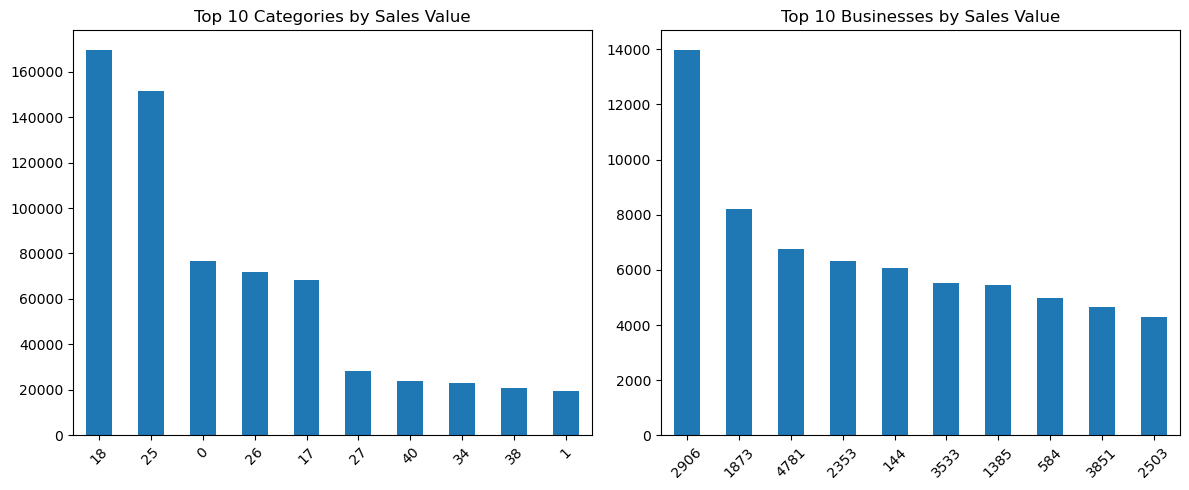

In [69]:
# Visualizations for Category and Business Sales by Total Quantity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
Category_sales_Quantity['Total_Quantity'].head(10).plot(kind='bar')
plt.title('Top 10 Categories by Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1, 2, 2)
Business_sales_Quantity['Total_Quantity'].head(10).plot(kind='bar')
plt.title('Top 10 Businesses by Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Trends Over Time Analysis

-Time Series Plot to show patterns over time In Sales Performance

In [72]:
sales_data_cleaned.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,VALUE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024,7400.0


In [102]:
sales_data_cleaned['DATE'] = pd.to_datetime(sales_data_cleaned['DATE'], format = '%B %Y')

In [104]:
monthly_trends= sales_data_cleaned.groupby(['Month-Year', 'DATE']).agg(Total_Quantity=('QUANTITY', 'sum'), Total_Value= ('VALUE', 'sum')).reset_index()
monthly_trends.head()

,Month-Year,DATE,Total_Quantity,Total_Value
0,April 2024,2024-04-01 08:42:00,2,3980.0
1,April 2024,2024-04-01 10:59:00,5,13740.0
2,April 2024,2024-04-01 11:55:00,3,7640.0
3,April 2024,2024-04-01 12:24:00,2,3420.0
4,April 2024,2024-04-01 12:25:00,5,7400.0


In [106]:
# Time series analysis
# Analyze sales trends over time (Month-Year)
monthly_trends = (
    sales_data_cleaned
    .groupby(sales_data_cleaned['DATE'].dt.to_period('M'))
    .agg(Total_Quantity=('QUANTITY', 'sum'), Total_Value=('VALUE', 'sum'))
    .reset_index()
)

monthly_trends

,DATE,Total_Quantity,Total_Value
0,2024-01,67526,185626186.0
1,2024-02,44063,126579702.0
2,2024-03,45382,116000676.0
3,2024-04,50554,122110750.0
4,2024-05,69551,168781502.0
5,2024-06,60717,135138614.0
6,2024-07,74691,171040881.0
7,2024-08,68859,146581003.0
8,2024-09,66747,137791455.0
9,2024-10,84739,183840551.0


In [108]:
print(monthly_trends.dtypes)

DATE              period[M]
Total_Quantity        int64
Total_Value         float64
dtype: object


In [118]:
monthly_trends['DATE'] = monthly_trends['DATE'].astype(str)  # Convert period to string
monthly_trends['DATE'] = pd.to_datetime(monthly_trends['DATE'])  # Convert to datetime

In [124]:
print(monthly_trends.isna().sum())  # Check for NaN values
print(monthly_trends[monthly_trends['Total_Value'] == np.inf])  # Check for infinite values

DATE              0
Total_Quantity    0
Total_Value       0
dtype: int64
Empty DataFrame
Columns: [DATE, Total_Quantity, Total_Value]
Index: []


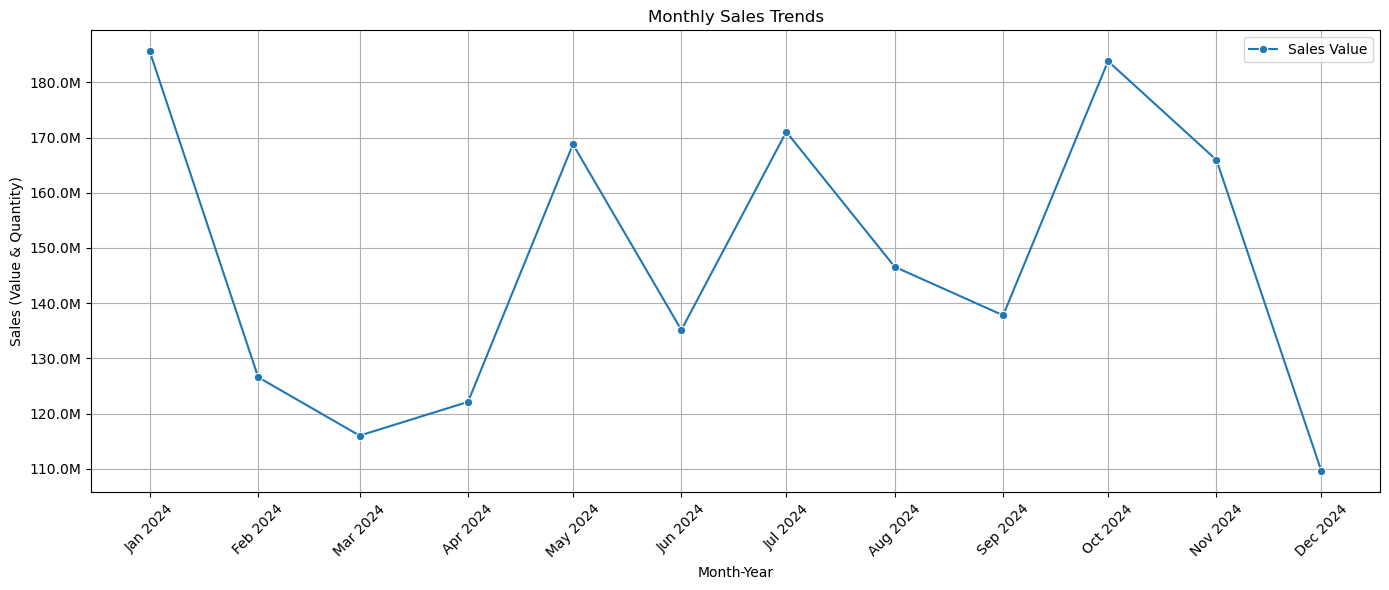

In [126]:
# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'  # Formats as millions with 1 decimal place
    
# Time series plot
plt.figure(figsize=(14, 6))

# Line plot for Monthly Trends
sns.lineplot(data=monthly_trends, x='DATE', y='Total_Value', label='Sales Value', marker='o')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

# Format x-axis to show 1-month intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set locator for 1-month intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year" (e.g., Jan 2024)

# Add titles and labels
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Sales (Value & Quantity)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

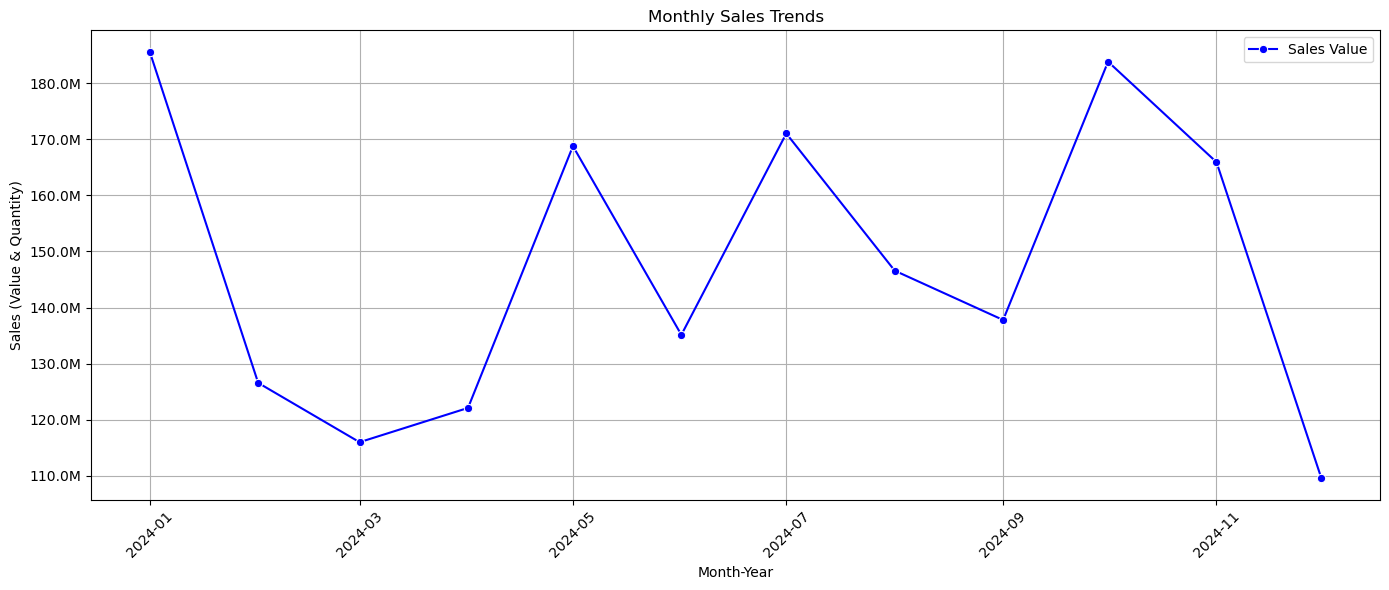

In [134]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'  # Formats as millions with 1 decimal place
    
# Time series plot
plt.figure(figsize=(14, 6))

# Line plot for Monthly Trends
sns.lineplot(data=monthly_trends, x='DATE', y='Total_Value', label='Sales Value', marker='o', color='blue')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

# Add titles and labels
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Sales (Value & Quantity)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

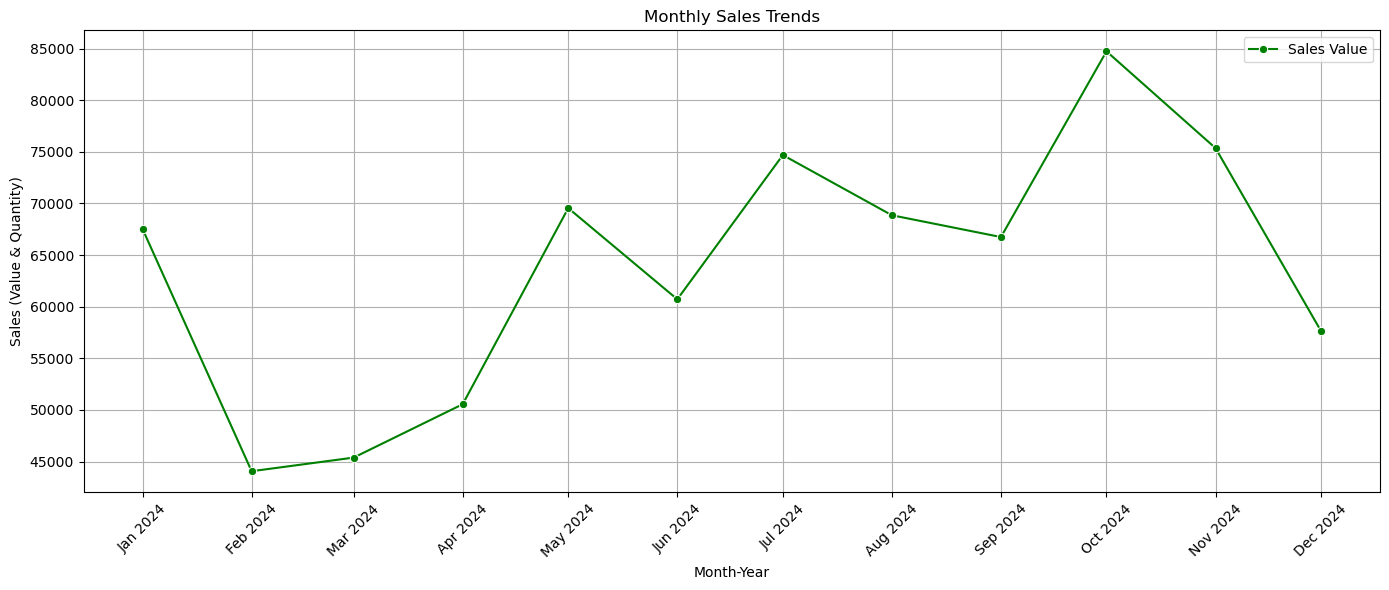

In [130]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Time series plot
plt.figure(figsize=(14, 6))

# Line plot for Monthly Trends
sns.lineplot(data=monthly_trends, x='DATE', y='Total_Quantity', label='Sales Value', marker='o', color='green')

# Format x-axis to show 1-month intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set locator for 1-month intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year" (e.g., Jan 2024)

# Add titles and labels
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Sales (Value & Quantity)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

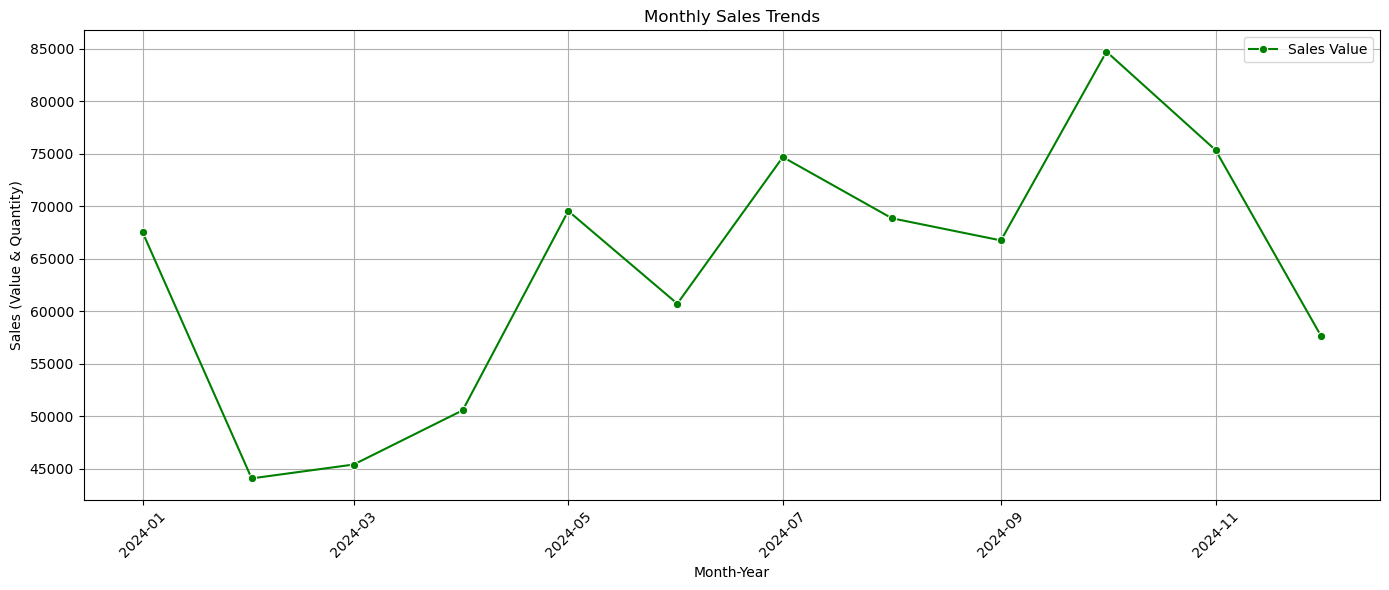

In [132]:
# Time series plot
plt.figure(figsize=(14, 6))

# Line plot for Monthly Trends
sns.lineplot(data=monthly_trends, x='DATE', y='Total_Quantity', label='Sales Value', marker='o', color='green')

# Add titles and labels
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Sales (Value & Quantity)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Perfomance Analysis
- The top 5 most frequently purchased products based on the Quantity
- The top 5 most valuable products based on the value.

In [136]:
# Top 5 most frequently purchased products based on Quantity
top_products_quantity = sales_data_cleaned.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().sort_values(ascending=False).head(5)

In [138]:
# Convert to a DataFrame
table_top_products_quantities = top_products_quantity.reset_index()
table_top_products_quantities.columns = ['Product', 'Total Quantity']

# Display the table
print(table_top_products_quantities)

from tabulate import tabulate

print("Top 5 Products by Quantity:")
print(tabulate(table_top_products_quantities, headers='keys', tablefmt='grid'))

        Product  Total Quantity
0  Product-66e0           46957
1  Product-e805           42602
2  Product-8f75           37566
3  Product-29ee           35940
4  Product-4156           28487
Top 5 Products by Quantity:
+----+--------------+------------------+
|    | Product      |   Total Quantity |
+====+==============+==================+
|  0 | Product-66e0 |            46957 |
+----+--------------+------------------+
|  1 | Product-e805 |            42602 |
+----+--------------+------------------+
|  2 | Product-8f75 |            37566 |
+----+--------------+------------------+
|  3 | Product-29ee |            35940 |
+----+--------------+------------------+
|  4 | Product-4156 |            28487 |
+----+--------------+------------------+


We observe that the most frequently purchased product is Product-66e0 with a total quantity of 46,957.

In [141]:
# Top 5 most valuable products (Value)
top_products_value = sales_data_cleaned.groupby('ANONYMIZED PRODUCT')['VALUE'].sum().sort_values(ascending=False).head(5)

In [143]:
# Convert to a DataFrame
table_top_products_value = top_products_value.reset_index()
table_top_products_value.columns = ['Product', 'Total Value']

# Display the table
print(table_top_products_value)

from tabulate import tabulate

print("Top 5 Products by Value:")
print(tabulate(table_top_products_value, headers='keys', tablefmt='grid'))

        Product  Total Value
0  Product-e805  262787281.0
1  Product-8f75  158797460.0
2  Product-66e0   70704225.0
3  Product-29ee   68248274.0
4  Product-4156   56956007.0
Top 5 Products by Value:
+----+--------------+---------------+
|    | Product      |   Total Value |
+====+==============+===============+
|  0 | Product-e805 |   2.62787e+08 |
+----+--------------+---------------+
|  1 | Product-8f75 |   1.58797e+08 |
+----+--------------+---------------+
|  2 | Product-66e0 |   7.07042e+07 |
+----+--------------+---------------+
|  3 | Product-29ee |   6.82483e+07 |
+----+--------------+---------------+
|  4 | Product-4156 |   5.6956e+07  |
+----+--------------+---------------+


We observe that the most valuable product based on the total value of the item is Product-e805 with a total value of 262,787,281.00

SECTION 3: ADVANCED ANALYSIS

Customer Segmentation
- An analysis of the Anonymized Business based on the Total Quantity purchased, Total Value contributed and Frequency of Tramsactions
- classify the businesses into 3 groups (High Value, Medium Value, Low Value)

In [148]:
# Aggregate the data
# Group by 'ANONYMIZED BUSINESS' to calculate total quantity, total value, and transaction frequency
business_segment = sales_data_cleaned.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('UNIT PRICE', 'sum'),
    Frequency_of_Transactions=('DATE', 'count')
).reset_index()

In [150]:
business_segment.head()

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Frequency_of_Transactions
0,Business-0000,8,10445.0,8
1,Business-0005,1,2645.0,1
2,Business-0029,26,18385.0,6
3,Business-003d,98,73251.0,31
4,Business-0072,127,194501.0,101


In [152]:
# Import all the necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

Perform Clustering: This Is so as to segment the businesses into clusters using K-Means Feature. Classify the businesses into 3 groups of High Value, Medium Value and Low Value.

In [155]:
# Standardize the features
scaler = StandardScaler()
business_segment_scaled = scaler.fit_transform(business_segment[['Total_Quantity', 'Total_Value', 'Frequency_of_Transactions']])

In [157]:
# Apply KMeans clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
business_segment['Segment'] = kmeans.fit_predict(business_segment_scaled)

In [159]:
# Map segments to meaningful labels based on Value
segment_labels = {
    business_segment.groupby('Segment')['Total_Value'].mean().sort_values().index[0]: 'Low Value',
    business_segment.groupby('Segment')['Total_Value'].mean().sort_values().index[1]: 'Medium Value',
    business_segment.groupby('Segment')['Total_Value'].mean().sort_values().index[2]: 'High Value'
}
business_segment['Segment'] = business_segment['Segment'].map(segment_labels)

business_segment

,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Frequency_of_Transactions,Segment
0,Business-0000,8,10445.0,8,Low Value
1,Business-0005,1,2645.0,1,Low Value
2,Business-0029,26,18385.0,6,Low Value
3,Business-003d,98,73251.0,31,Low Value
4,Business-0072,127,194501.0,101,Low Value
...,...,...,...,...,...
4795,Business-ffa9,3,6740.0,3,Low Value
4796,Business-ffae,6,9890.0,5,Low Value
4797,Business-ffb1,266,259006.0,105,Low Value
4798,Business-ffd2,37,48217.0,22,Low Value


In [161]:
# Display segment characteristics
print("Business Segmentation Summary:")
business_segment.groupby('Segment').agg({
    'ANONYMIZED BUSINESS': 'count',
    'Total_Quantity': 'mean',
    'Total_Value': 'mean',
    'Frequency_of_Transactions': 'mean'
}).round(2)

Business Segmentation Summary:


,ANONYMIZED BUSINESS,Total_Quantity,Total_Value,Frequency_of_Transactions
Segment,,,,
High Value,51,3176.41,2377910.82,945.06
Low Value,4373,65.53,68734.96,31.58
Medium Value,376,843.76,912578.50,381.86


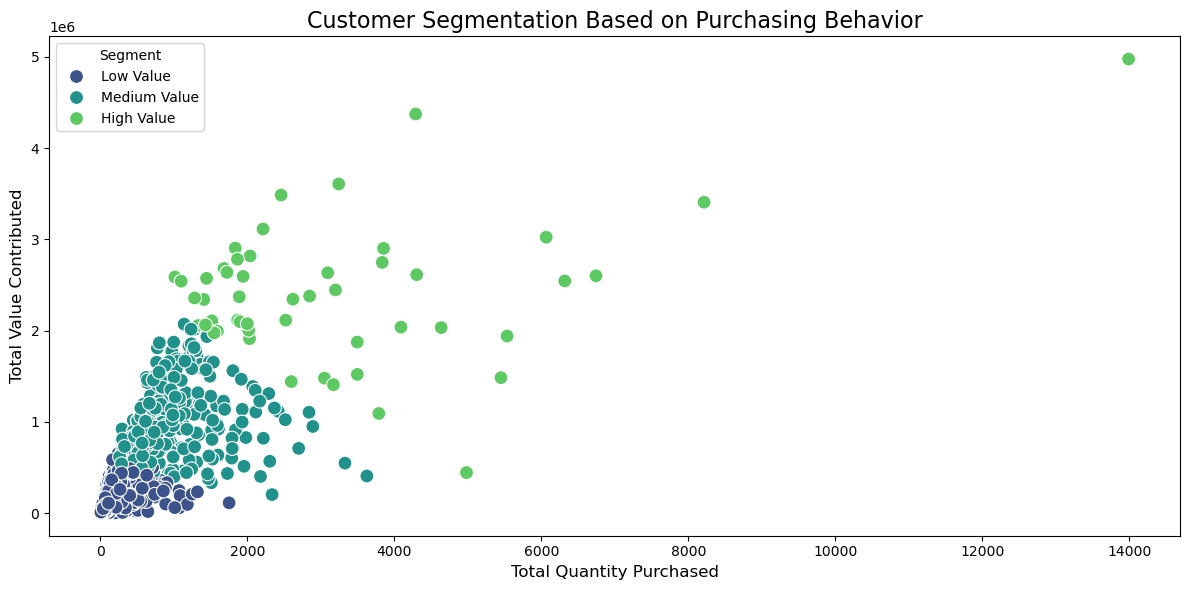

In [163]:
# Plot the business segments based on total quantity and total value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=business_segment, x='Total_Quantity', y='Total_Value', hue='Segment', palette='viridis', s=100)

plt.title('Customer Segmentation Based on Purchasing Behavior', fontsize=16)
plt.xlabel('Total Quantity Purchased', fontsize=12)
plt.ylabel('Total Value Contributed', fontsize=12)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

1. Low value: (High Volume, Low Frequency): Businesses that purchase large quantities but infrequently.
2. Medium Value: (High Volume, High Frequency): Businesses that purchase large quantities frequently.
3. High Value: (Low Volume, Low Frequency): Businesses that make small, infrequent purchases.

Insights:
- Top Performing Businesses: Businesses with high total value and high frequency.
- Opportunities for Retention: Low frequency but high value businesses could be a target for engagement.

RECOMMENDATIONS FOR ENGAGEMENT FOR EACH GROUP

1. Low Value Segment (e.g., Low Frequency & Low Total Value)
These businesses tend to purchase in small quantities and infrequently. The goal here is to increase their frequency of purchases and explore strategies for upselling.

Engagement Recommendations:
- Personalized Communication: Send targeted marketing campaigns offering discounts on bulk purchases, reminding them of the benefits of buying more frequently.
- Loyalty Programs: Offer incentives for repeat purchases, such as loyalty points, rewards for bulk purchasing, or discounts on their next order if they buy within a specified period.
Product Bundling: Encourage businesses to purchase more by offering bundled products at a discounted price.
- Incentives for Frequency: Implement campaigns such as "Buy X, Get Y Free" or "Discounts for Next Order" to motivate businesses to purchase more regularly.
- Customer Support: Provide proactive customer service to understand their pain points and help them find products that may be better suited to their needs, possibly increasing their order volume.
  
Key Focus:
- Increase Frequency: Encourage more frequent purchases by demonstrating value or cost-saving opportunities.
- Upselling: Suggest higher-value or complementary products to increase the total value of purchases.
  
2. High Value Segment (e.g., High Frequency & High Total Value)
These businesses are already purchasing large quantities and doing so frequently. They are your most valuable customers, so the focus should be on maintaining a strong relationship, rewarding their loyalty, and ensuring their needs are met.

Engagement Recommendations:
- Exclusive Offers: Provide tailored offers such as bulk discounts, early access to new products, or exclusive deals that align with their high volume of purchases.
Dedicated Account Manager: Assign a dedicated account manager to understand their business needs more deeply and offer personalized support and solutions.
- VIP Loyalty Programs: Provide elite-level loyalty programs with perks such as faster shipping, priority customer support, or specialized pricing.
Collaborative Initiatives: Consider partnering with these businesses on joint marketing campaigns or co-branding initiatives, leveraging their frequent purchases for mutual benefit.
- Innovative Products/Upgrades: Keep them updated on the latest products and offer trials for new product lines that could suit their growing demand.
  
Key Focus:
- Reward Loyalty: Strengthen the relationship by offering high-value rewards, special services, or even exclusive experiences.
- Maintain Engagement: Keep them engaged by continuously offering valuable solutions and exploring cross-sell opportunities.
  
3. Opportunistic Segment (e.g., Businesses with High Quantity but Low Frequency)
These businesses purchase in large quantities but are not frequent purchasers. The goal is to turn them into regular customers while maintaining their large order sizes.

Engagement Recommendations:
- Encourage Regular Purchases: Send reminders or create time-limited offers that encourage them to purchase more regularly, even if the purchases are in smaller quantities.
- Create Urgency: Introduce seasonal offers or product availability alerts that encourage them to place orders before products run out or discounts expire.
- Volume Discounts for Regular Orders: Provide incentives that reward them for consistent, repeat orders. For example, discounts for purchasing the same quantity every month or a subscription-based model.
- Replenishment Reminders: Set up automated emails or reminders to prompt these businesses to reorder before they run out of stock.
- Payment Flexibility: Offer payment terms such as installment options, which might make them more likely to place additional orders.
Key Focus:
- Increase Frequency: Focus on motivating these businesses to become regular customers by offering incentives and removing barriers to more frequent purchases.
- Provide Convenience: Make it easier for them to reorder and stay engaged with your brand.
  
4. General Recommendations for All Segments:
- Analyze and Personalize: Regularly analyze each business's purchasing behavior to tailor specific offers, product recommendations, and promotional strategies. Use this information to anticipate their needs.
- Data-Driven Insights: Provide businesses with insights into their purchasing behavior and trends. This may help businesses recognize the benefits of purchasing more frequently or in larger quantities.
  
Conclusion:

By understanding each segment's purchasing patterns, you can tailor your engagement strategies to:
- Increase frequency in low-value segments.
- Reward loyalty and provide exclusivity for high-value segments.
- Encourage consistency in opportunistic high-quantity, low-frequency segments.

Forecasting

Will use the data to forecast the Total Sales(Value) for the next 3 months

In [168]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [170]:
# Import all necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [172]:
sales_data_cleaned['DATE'] = pd.to_datetime(sales_data_cleaned['DATE'], format='%B %Y')  # Convert 'DATE' to datetime format

In [174]:
monthly_sales= sales_data_cleaned.groupby(['Month-Year', 'DATE']).agg(Total_Value= ('VALUE', 'sum')).reset_index()
monthly_sales

,Month-Year,DATE,Total_Value
0,April 2024,2024-04-01 08:42:00,3980.0
1,April 2024,2024-04-01 10:59:00,13740.0
2,April 2024,2024-04-01 11:55:00,7640.0
3,April 2024,2024-04-01 12:24:00,3420.0
4,April 2024,2024-04-01 12:25:00,7400.0
...,...,...,...
96698,September 2024,2024-09-30 22:52:00,41965.0
96699,September 2024,2024-09-30 22:54:00,4380.0
96700,September 2024,2024-09-30 22:57:00,31145.0
96701,September 2024,2024-09-30 23:09:00,17440.0


In [176]:
# Group by month and year, and aggregate total sales value
monthly_sales = sales_data_cleaned.groupby(sales_data_cleaned['DATE'].dt.to_period('M')).agg(Total_Value= ('VALUE', 'sum')).reset_index()

In [178]:
#Check for stationarity (ADF test)
result = adfuller(monthly_sales['Total_Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.6781287719843134
p-value: 0.0779000137815491


Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This suggests that the time series is non-stationary, meaning the data may have a trend or seasonality that needs to be accounted for.

Let's use othe forecasting Method

Arima Forecasting

In [183]:
# Apply non-seasonal differencing with auto_arima
# Using d=1 for first-order differencing; we can let auto_arima find the best model
model = auto_arima(monthly_sales['Total_Value'], seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=461.011, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=487.822, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=458.602, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=482.484, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=460.132, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=456.966, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=458.727, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=485.339, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=452.607, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=449.121, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=447.478, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=449.438, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.217 seconds


In [185]:
# Print the summary of the model to see the selected parameters
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                        SARIMAX   Log Likelihood                -221.739
Date:                Wed, 29 Jan 2025   AIC                            447.478
Time:                        12:03:00   BIC                            448.448
Sample:                             0   HQIC                           447.119
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.474e+08    7.4e+06     19.923      0.000    1.33e+08    1.62e+08
sigma2       6.57e+14      0.014   4.57e+16      0.000    6.57e+14    6.57e+14
Ljung-Box (L1) (Q):                   0.17   Jarque-

In [187]:
# Forecast the next 3 months (adjust the number of periods)
forecast = model.predict(n_periods=3)
forecast

12    147414516.5
13    147414516.5
14    147414516.5
dtype: float64

In [189]:
# Forecasted dates (next 3 months)
forecast_dates = pd.date_range(monthly_sales['DATE'].max().to_timestamp(), periods=4, freq='M')[1:]
forecast_dates

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31'], dtype='datetime64[ns]', freq='ME')

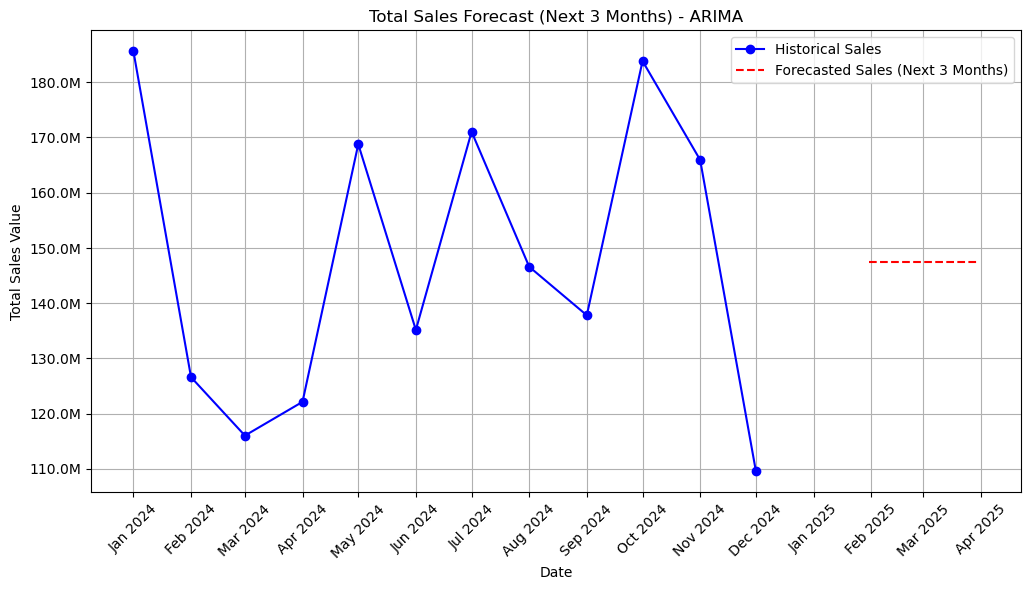

In [191]:
# Plotting the forecast
# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'  # Formats as millions with 1 decimal place
    
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['DATE'].dt.to_timestamp(), monthly_sales['Total_Value'], label='Historical Sales', color='blue', marker='o')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

# Format x-axis to show 1-month intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set locator for 1-month intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year" (e.g., Jan 2024)

plt.plot(forecast_dates, forecast, label='Forecasted Sales (Next 3 Months)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Forecast (Next 3 Months) - ARIMA')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [193]:
print (forecast_dates)

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31'], dtype='datetime64[ns]', freq='ME')


The forecast dates for the next 3 months are:
- 2025-01-31 (January 31st 2025)
- 2025-02-28 (February 2nd 2025)
- 2025-03-31 (March 31st 2025)          

Moving Average Forecasting Method - Time series

In [197]:
# Aggregate data to monthly totals
movingAvg_sales = sales_data_cleaned.groupby(sales_data_cleaned['DATE'].dt.to_period('M')).agg(Total_Value=('VALUE', 'sum'), Total_Quantity=('QUANTITY', 'sum')).reset_index()

In [199]:
movingAvg_sales

,DATE,Total_Value,Total_Quantity
0,2024-01,185626186.0,67526
1,2024-02,126579702.0,44063
2,2024-03,116000676.0,45382
3,2024-04,122110750.0,50554
4,2024-05,168781502.0,69551
5,2024-06,135138614.0,60717
6,2024-07,171040881.0,74691
7,2024-08,146581003.0,68859
8,2024-09,137791455.0,66747
9,2024-10,183840551.0,84739


In [201]:
# Convert 'DATE' back to datetime for arithmetic operations
movingAvg_sales['DATE'] = movingAvg_sales['DATE'].dt.to_timestamp()

In [203]:
# Set the "Date" column as the index
movingAvg_sales.set_index("DATE", inplace=True)

In [205]:
# Calculate a 3-month moving average
movingAvg_sales["Moving_Avg"] = movingAvg_sales["Total_Value"].rolling(window=3).mean()

In [207]:
# Forecast the next 3 months using the last moving average value
last_moving_avg = movingAvg_sales["Moving_Avg"].iloc[-1]
forecast_values = [last_moving_avg] * 3

In [209]:
# Generate forecast index (next 3 months)
forecast_index = pd.date_range(start=movingAvg_sales.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')
forecast_index 

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31'], dtype='datetime64[ns]', freq='ME')

In [211]:
# Create a forecast series
forecast_series = pd.Series(forecast_values, index=forecast_index)
forecast_series

2025-01-31    1.531078e+08
2025-02-28    1.531078e+08
2025-03-31    1.531078e+08
Freq: ME, dtype: float64

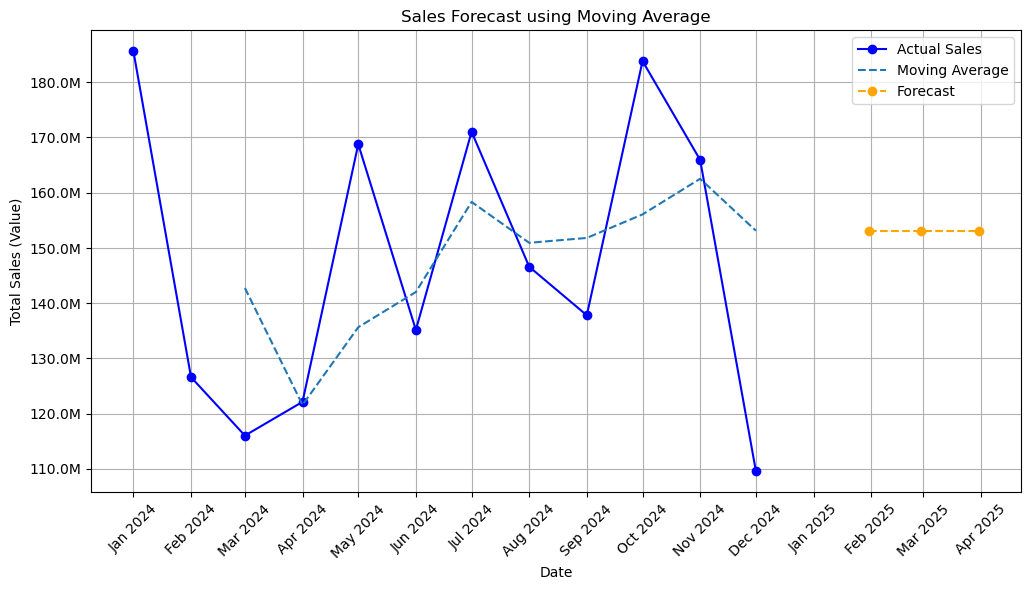

In [215]:
# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'
    
# Plot the data and forecast
plt.figure(figsize=(12, 6))
plt.plot(movingAvg_sales["Total_Value"], label="Actual Sales", color='blue', marker='o')
plt.plot(movingAvg_sales["Moving_Avg"], label="Moving Average", linestyle="--")
plt.plot(forecast_series, label="Forecast", linestyle="--", color="orange", marker='o')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

# Format x-axis to show 1-month intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set locator for 1-month intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year" (e.g., Jan 2024)

plt.title("Sales Forecast using Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Sales (Value)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [217]:
# Display the forecasted values
print("Forecasted Sales for the Next 3 Months:")
forecast_series

Forecasted Sales for the Next 3 Months:


2025-01-31    1.531078e+08
2025-02-28    1.531078e+08
2025-03-31    1.531078e+08
Freq: ME, dtype: float64

Total Sales Forecasting Using Moving Average
I was able to forecast the Total sales for the next 3 months using a 3-month Average moving method.
The Forecasted sales are: 
- 2025-01-31 (January 31st 2025)
- 2025-02-28 (February 2nd 2025)
- 2025-03-31 (March 31st 2025)

I used a line plot to compare the actual sales, moving average trend, and forecasted values for better interpretability.

The Forecasting for both Arima Model and Moving Average remained Consistent

3.3  ANOMOLAY DETECTION IN SALES PERFORMANCE
- To identify Any Unusual spikes or drops in sales performance using either Quantity and Value

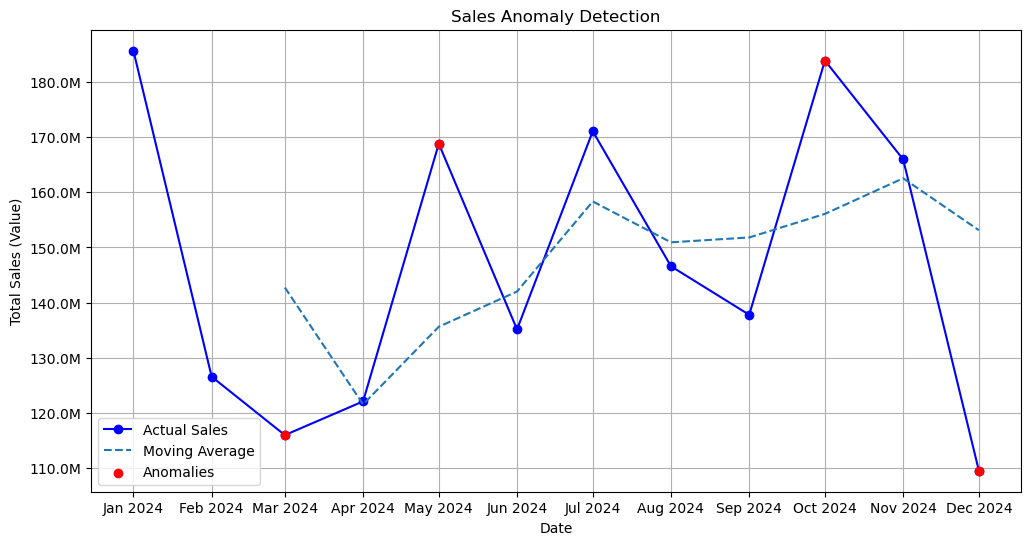

Detected Anomalies:
            Total_Value    Moving_Avg     Residuals
DATE                                               
2024-03-01  116000676.0  1.427355e+08 -2.673485e+07
2024-05-01  168781502.0  1.356310e+08  3.315053e+07
2024-10-01  183840551.0  1.560710e+08  2.776955e+07
2024-12-01  109549774.0  1.531078e+08 -4.355804e+07


In [238]:
# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'
    
# Calculate the residuals (difference between actual sales and moving average)
movingAvg_sales["Residuals"] = movingAvg_sales["Total_Value"] - movingAvg_sales["Moving_Avg"]

# Define the threshold for anomaly detection (e.g., 2 standard deviations)
std_dev = movingAvg_sales["Residuals"].std()
threshold = 1 * std_dev

# Identify anomalies (values exceeding the threshold)
movingAvg_sales["Anomaly"] = np.where(
    (movingAvg_sales["Residuals"].abs() > threshold),
    "Anomaly",
    "Normal"
)

# Separate anomalies for visualization
anomalies = movingAvg_sales[movingAvg_sales["Anomaly"] == "Anomaly"]

# Plot the data with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(movingAvg_sales.index, movingAvg_sales["Total_Value"], label="Actual Sales", color='blue', marker='o')
plt.plot(movingAvg_sales["Moving_Avg"], label="Moving Average", linestyle="--")

plt.scatter(anomalies.index, anomalies["Total_Value"], color='red', label="Anomalies", zorder=5)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

# Format x-axis to show 1-month intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set locator for 1-month intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year" (e.g., Jan 2024)

plt.title("Sales Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Total Sales (Value)")
plt.legend()
plt.grid()
plt.show()

# Display anomalies
print("Detected Anomalies:")
print(anomalies[["Total_Value", "Moving_Avg", "Residuals"]])

Reasons for Anomalies in the Graph (represented by the red dots)
1. Spikes in sales (March-May)
   
   a) Seasonal or Holiday Demand:
   - A lot of people purchase gifts during the holidays and this could a factor in the increase in suddend sales. Also seasonal purchases, where the is      change in weather conditions could be a nother factor.
     
   b) Marketing Campaigns and Promotions/Discounts:
   - This can be short-term sales events/promotions such as "Flash Sales"  or even aggressive advertising and this can lead to an increase in sudden         sales.
     
   c) Data Anomalies : 
   - Errors in report by maybe Double-counting of sales, delayed invoicing, or system failure resulting in artificially inflated                             numbers
   - An event where there is an Unusual client order or event-based bulk purchase (e.g. corporate gifts).
     
   d) New Product Launches:
   - Perhaps a new product has entered the market and has a lot of traffic, thus, boosting sales significantly.

    

3. Drops in Sales
   
   a) Post-Holiday Slump:
   - Decline in January 2024 is typical after holiday spending, as shoppers reduce purchases.
     
   b) Supply Chain Disruptions:
   - Stockouts due to supply chain delays (e.g., port strikes, supplier issues) can cause temporary declines.
     
   c) Economic or Competitive Pressures:
   - Inflation, decreased consumer confidence, or competitor promotions (e.g., Amazon Prime Day) can suppress sales during some months.
     

   d) Operational Issues:
   - Technical issues (e.g., e-commerce website crashes) or payment processing errors can cause unexpected dips.expected dips.

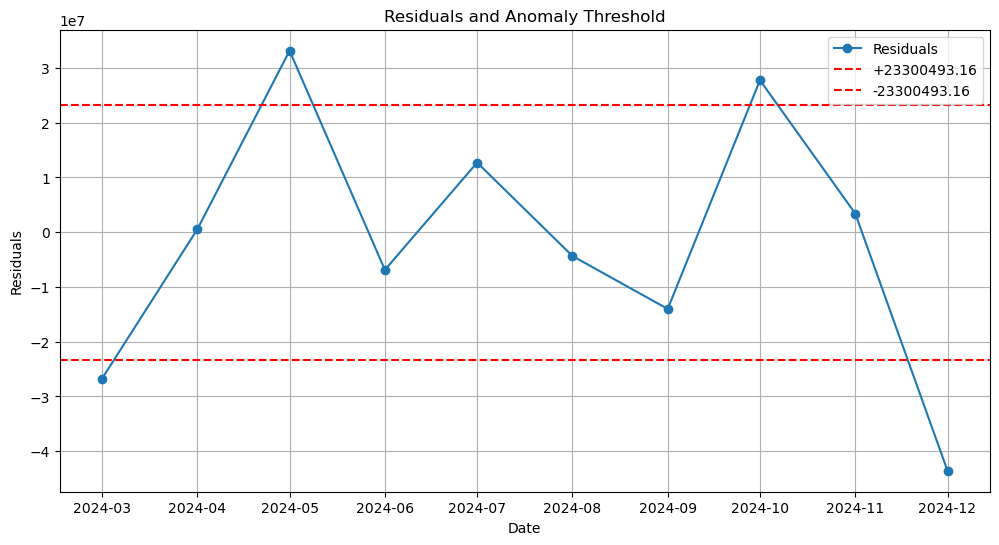

In [224]:
# Plot the data with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(movingAvg_sales.index, movingAvg_sales["Residuals"], marker='o', label="Residuals")
plt.axhline(threshold, color='red', linestyle='--', label=f"+{threshold:.2f}")
plt.axhline(-threshold, color='red', linestyle='--', label=f"-{threshold:.2f}")
plt.title("Residuals and Anomaly Threshold")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

3.4 CORRELATION ANALYSIS
- Relationship between quantity and value.

Pearson Correlation: 0.84, p-value: 0.0000


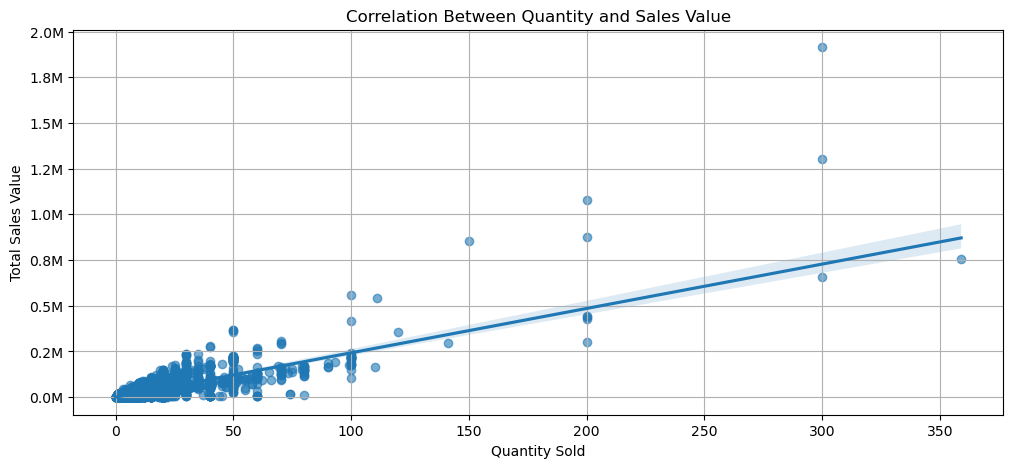

In [290]:
import seaborn as sns
import scipy.stats as stats

# Compute the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(sales_data_cleaned['QUANTITY'], sales_data_cleaned['VALUE'])
print(f"Pearson Correlation: {correlation:.2f}, p-value: {p_value:.4f}")

# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 5))
sns.regplot(x=sales_data_cleaned['QUANTITY'], y=sales_data_cleaned['VALUE'], scatter_kws={'alpha':0.6})

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.xlabel("Quantity Sold")
plt.ylabel("Total Sales Value")
plt.title("Correlation Between Quantity and Sales Value")
plt.grid(True)
plt.show()

Transaction-Level Analysis (Chart above)

Purpose: Examines the relationship between the quantity sold and total sales value at transactional level.

Insights:
- A clear positive correlation between the quantity sold and total sales value was observed, suggesting that higher quantities sold contribute directly to increased sales revenue.

This approach is useful for identifying individual drivers of sales performance, such as product-specific trends, pricing effects, or customer purchasing behaviors.

Application:
- Effective for analyzing micro-level drivers like impulse buys, promotional impacts on specific products, or identifying outliers in transaction data.


Pearson Correlation: 0.83, p-value: 0.0008


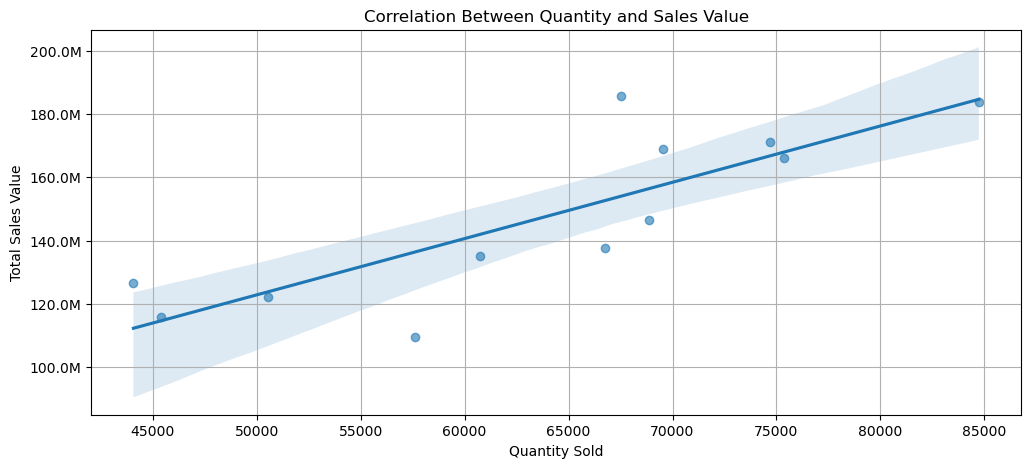

In [231]:
# Compute the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(movingAvg_sales["Total_Quantity"], movingAvg_sales["Total_Value"])
print(f"Pearson Correlation: {correlation:.2f}, p-value: {p_value:.4f}")

# Function to format t# Function to format he y-axis values
def format_millions(x, pos):
    return f'{x / 1_000_000:.1f}M'

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 5))
sns.regplot(x=movingAvg_sales["Total_Quantity"], y=movingAvg_sales["Total_Value"], scatter_kws={'alpha':0.6})

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.xlabel("Quantity Sold")
plt.ylabel("Total Sales Value")
plt.title("Correlation Between Quantity and Sales Value")
plt.grid()
plt.show()

Aggregated Monthly Analysis

Purpose: Explores the relationship between total quantity sold and total sales value at the monthly level, aggregating data by the 'Month-Year' dimension.

Insights:
- The positive correlation between aggregated monthly quantities and sales value highlights macro-level trends, including seasonality, long-term sales growth, or the impact of marketing campaigns.
- Aggregation reduces noise and outliers, making it suitable for identifying time-based patterns.
  
Application:
Ideal for examining seasonality, monthly sales trends, and planning long-term strategies like forecasting and performance evaluation.

Factors Driving Sales Performance

1. Product Factors:
- Pricing strategies, product mix, and availability.
- High-margin or popular products contribute significantly to revenue.
  
2. Customer Behavior:
- Impulse purchases, loyalty, and purchasing frequency.
- Customer demographics influencing product preferences.
  
3. Marketing and Promotions:
- Discounts, advertising campaigns, and cross-selling strategies.
  
4. Seasonality and Timing:
- Seasonal demand spikes and holiday promotions impacting monthly sales.

5. Market Trends:
- Competitor activities and market conditions influencing consumer choices.